# Exploratory Data Analysis (EDA) And Model Evaluation of Algerian Forest Fires dataset

# Predicting Fire Weather Index (FWI) - Regression Analysis

## Introduction
In this analysis, we aim to predict the Fire Weather Index (FWI) using regression models. FWI is a crucial metric for assessing fire risk, and accurate predictions can aid in fire management efforts.

### Dataset Description
- The dataset contains information related to weather and environmental factors.
- We have added a 'Classes' column to categorize instances as 'fire' or 'not fire' based on FWI values.

## Data Preprocessing and Exploration
- We started by exploring the dataset, which involved initial data cleaning.
- Created the 'Classes' column to categorize instances.
- Utilized box plots to gain insights into FWI distribution.

## Feature Selection and Data Splitting
- Separated independent and dependent variables for model training.
- Split the data into training and testing sets for model evaluation.

## Correlation Analysis
- Explored feature correlations through a correlation matrix.
- Removed highly correlated features based on a threshold of 0.85.

## Feature Scaling
- Applied StandardScaler for feature scaling.
- Examined the impact of scaling through box plots.

## Model Building and Evaluation
### Linear Regression
- Trained a Linear Regression model.
- Evaluated model performance using Mean Absolute Error (MAE) and R2 score.

### Lasso Regression
- Implemented Lasso Regression.
- Assessed model performance with MAE and R2 score.

### Ridge Regression
- Employed Ridge Regression.
- Evaluated model performance using MAE and R2 score.

### ElasticNet Regression
- Utilized ElasticNet Regression.
- Analyzed model performance with MAE and R2 score.

## Cross-Validation
- Performed cross-validation using LassoCV and RidgeCV.
- Included cross-validated MAE and R2 score results.

## Model Performance Summary
- Summarized the performance of all regression models.
- Discussed insights gained from model comparisons.
- Concluded with the best-performing model for FWI prediction.

## Conclusion
This analysis demonstrates the application of regression models for predicting the Fire Weather Index (FWI) based on weather and environmental factors. The choice of the best model can significantly aid in fire risk assessment and management.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Algerian Forest Fires dataset
df = pd.read_csv('forestfires.csv')

# Display the first few rows of the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [4]:
# Check the shape of the dataset
df.shape

(246, 14)

In [5]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
# Check for missing values in the dataset
df.isnull().sum()


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
# Add a 'Region' column to categorize the data into two regions
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1


In [8]:
# Convert the 'Region' column to integer type
df[['Region']] = df[['Region']].astype(int)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [10]:
# Drop rows with missing values
df = df.dropna().reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [13]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
# Remove extra spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [17]:

df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [19]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [20]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [21]:
# Identify columns with object data type and convert them to float
object_cols = [features for features in df.columns if df[features].dtypes == 'O']
for col in object_cols:
    if col != 'Classes':
        df[col] = df[col].astype(float)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [24]:
# Remove columns for day, month, and year
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [25]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
## categories in classes
df_copy['Classes'].value_counts()


Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [27]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [28]:
# Encode the 'Classes' column to binary values (0 for 'not fire' and 1 for 'fire')
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)


In [29]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:

df_copy['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [32]:
df_copy.to_csv('fireforest_clean.csv',index=False)

C:\Users\Amamk\AppData\Local\Temp\ipykernel_24804\4198035505.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

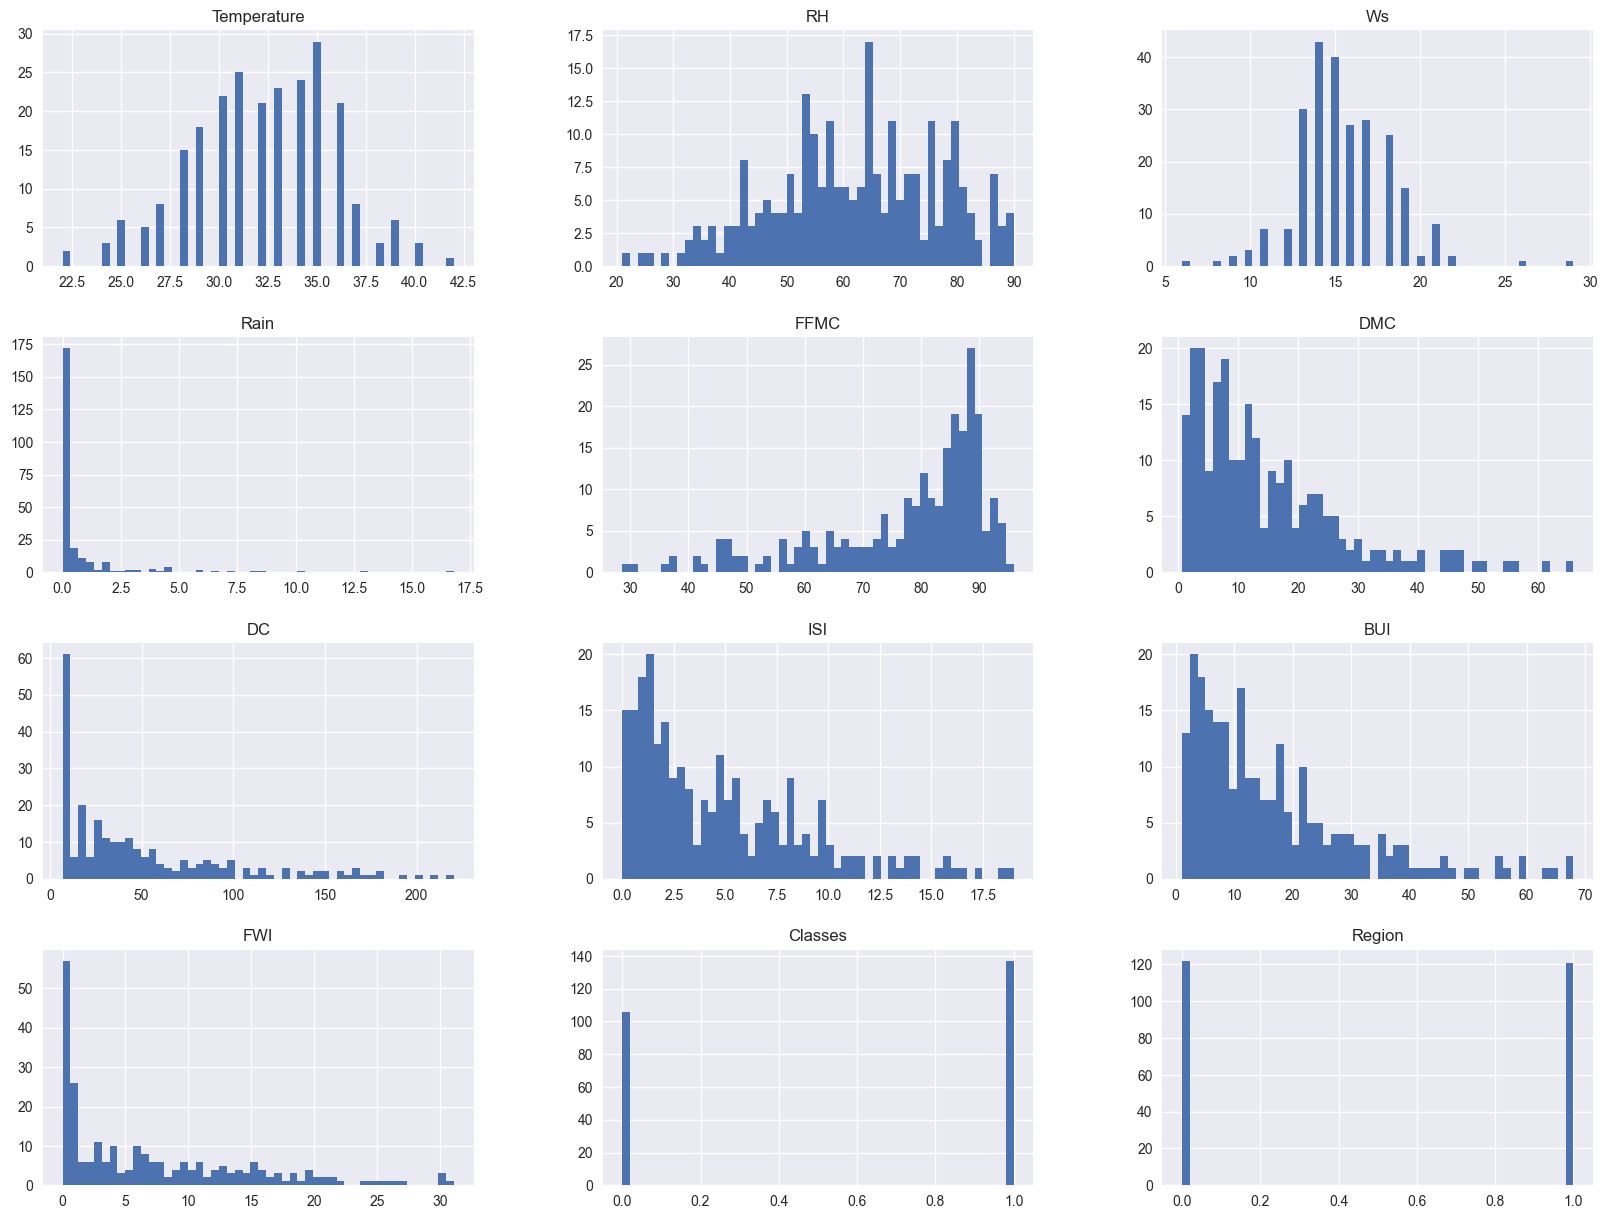

In [33]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))

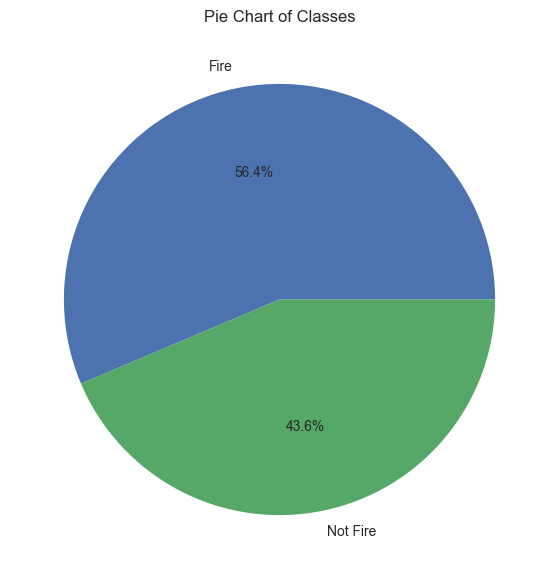

In [34]:
# Visualize the distribution of classes using a pie chart
percentage = df_copy['Classes'].value_counts(normalize=True) * 100
class_labels = ["Fire", "Not Fire"]
plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=class_labels, autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [35]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df_copy.corr()
correlation_matrix

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


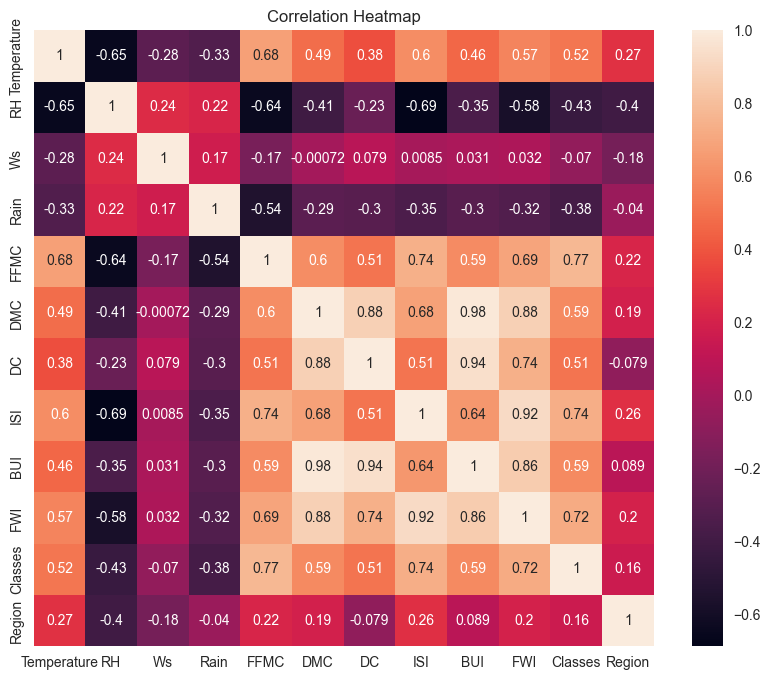

In [36]:
# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


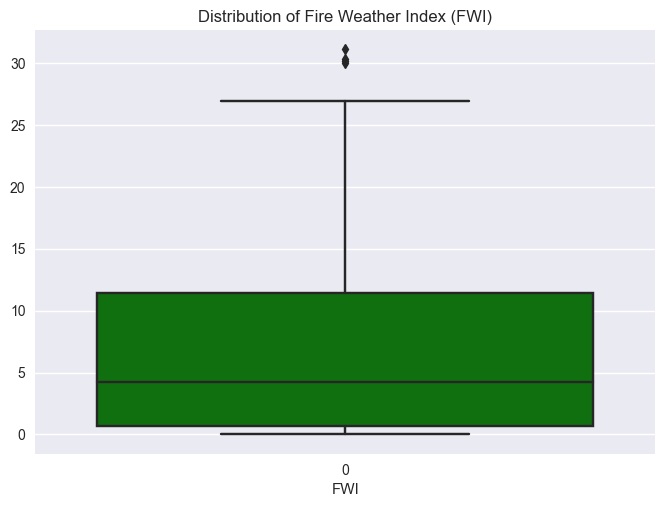

In [37]:
# Visualize the distribution of the 'FWI' column using a box plot
sns.boxplot(df_copy['FWI'], color='green')
plt.xlabel('FWI')
plt.title("Distribution of Fire Weather Index (FWI)")
plt.show()

In [38]:
# Rename 'Classes' values for consistency
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

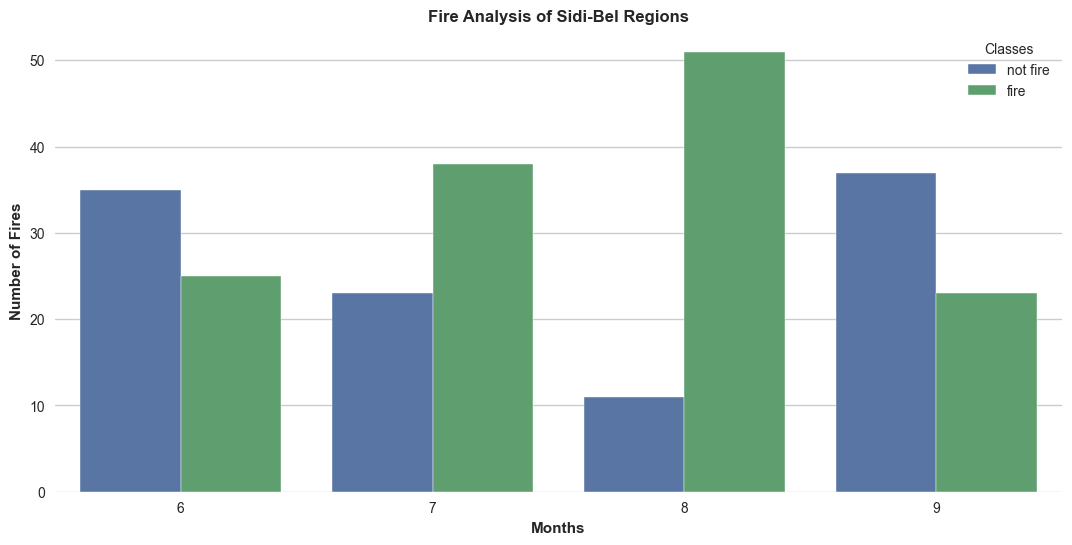

In [39]:
# Analyze monthly fire incidents
dftemp = df.loc[df['Region'] == 1]
plt.figure(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions", weight='bold')
plt.show()

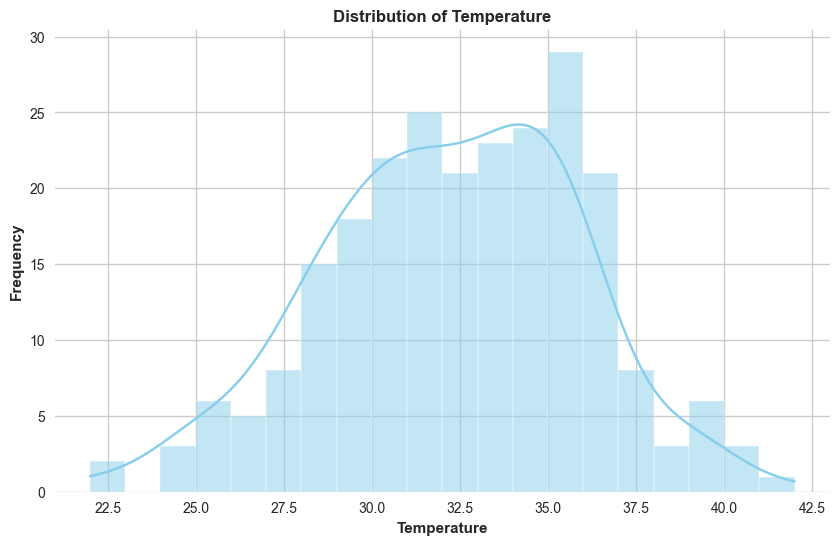

In [40]:
# Visualize the distribution of the 'Temperature' column using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['Temperature'], bins=20, kde=True, color='skyblue')
plt.xlabel('Temperature', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title("Distribution of Temperature", weight='bold')
plt.show()

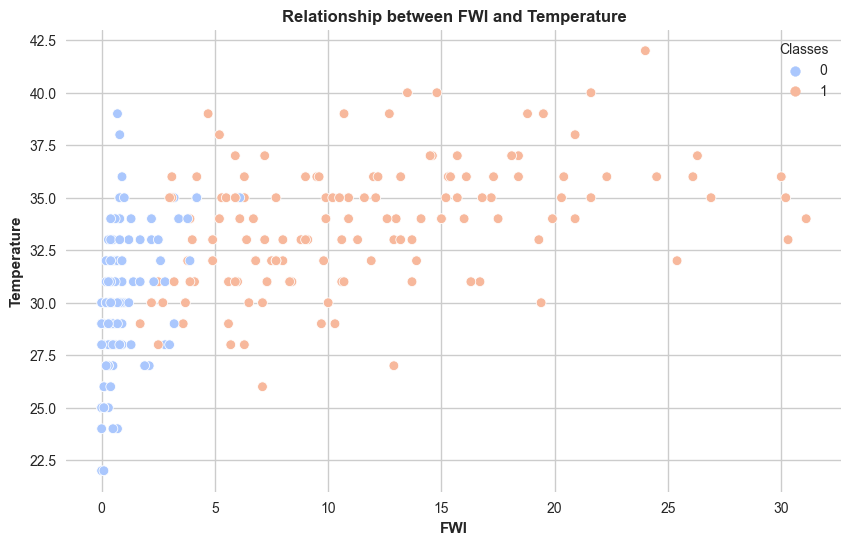

In [41]:
# Visualize the relationship between 'FWI' and 'Temperature'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FWI', y='Temperature', data=df_copy, hue='Classes', palette='coolwarm')
plt.xlabel('FWI', weight='bold')
plt.ylabel('Temperature', weight='bold')
plt.title("Relationship between FWI and Temperature", weight='bold')
plt.show()

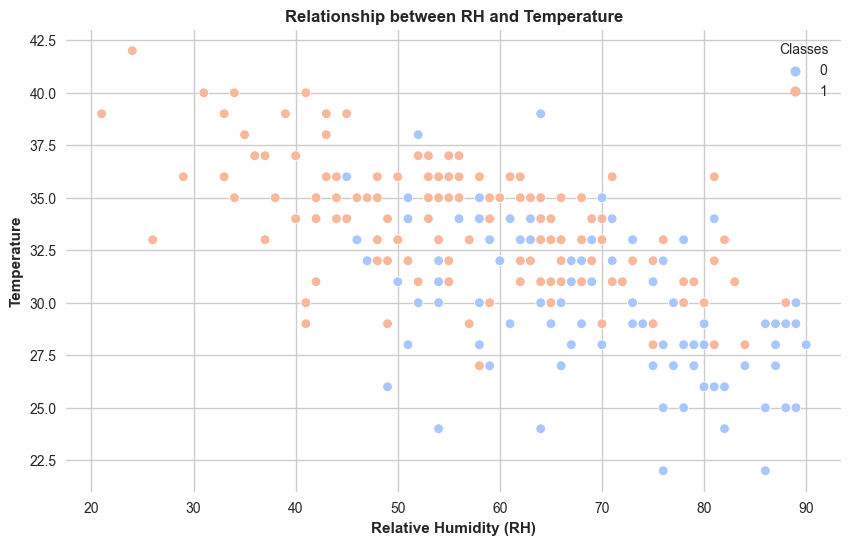

In [42]:
# Visualize the relationship between 'RH' and 'Temperature'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Temperature', data=df_copy, hue='Classes', palette='coolwarm')
plt.xlabel('Relative Humidity (RH)', weight='bold')
plt.ylabel('Temperature', weight='bold')
plt.title("Relationship between RH and Temperature", weight='bold')
plt.show()


In [43]:
# Calculate summary statistics for the numeric columns
summary_stats = df_copy.describe()

# Print the summary statistics
print(summary_stats)

# Calculate the proportion of fire incidents by region
proportion_by_region = df.groupby('Region')['Classes'].value_counts(normalize=True).unstack()
print(proportion_by_region)


       Temperature          RH          Ws        Rain        FFMC  \
count   243.000000  243.000000  243.000000  243.000000  243.000000   
mean     32.152263   62.041152   15.493827    0.762963   77.842387   
std       3.628039   14.828160    2.811385    2.003207   14.349641   
min      22.000000   21.000000    6.000000    0.000000   28.600000   
25%      30.000000   52.500000   14.000000    0.000000   71.850000   
50%      32.000000   63.000000   15.000000    0.000000   83.300000   
75%      35.000000   73.500000   17.000000    0.500000   88.300000   
max      42.000000   90.000000   29.000000   16.800000   96.000000   

              DMC          DC         ISI         BUI         FWI     Classes  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean    14.680658   49.430864    4.742387   16.690535    7.035391    0.563786   
std     12.393040   47.665606    4.154234   14.228421    7.440568    0.496938   
min      0.700000    6.900000    0.000000    

In this exploratory data analysis of the Algerian Forest Fires dataset, we performed several operations to better understand the data. We categorized the dataset into two regions, '0' and '1', representing different geographical areas. After handling missing values and converting data types, we visualized the distribution of fire incidents using a pie chart and explored correlations between features with a heatmap. Additionally, we analyzed the Fire Weather Index (FWI) distribution and examined the relationship between FWI, Temperature, and Relative Humidity (RH). Furthermore, we observed that fire incidents varied by month, with a higher number of fires during certain months in the Sidi-Bel region (Region 1). These insights can aid in understanding the factors contributing to forest fires in Algeria

In [44]:
df_copy.shape

(243, 12)

In [45]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [46]:
df=df_copy

In [47]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:

X_train.shape,X_test.shape

((162, 11), (81, 11))

In [50]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


<Axes: >

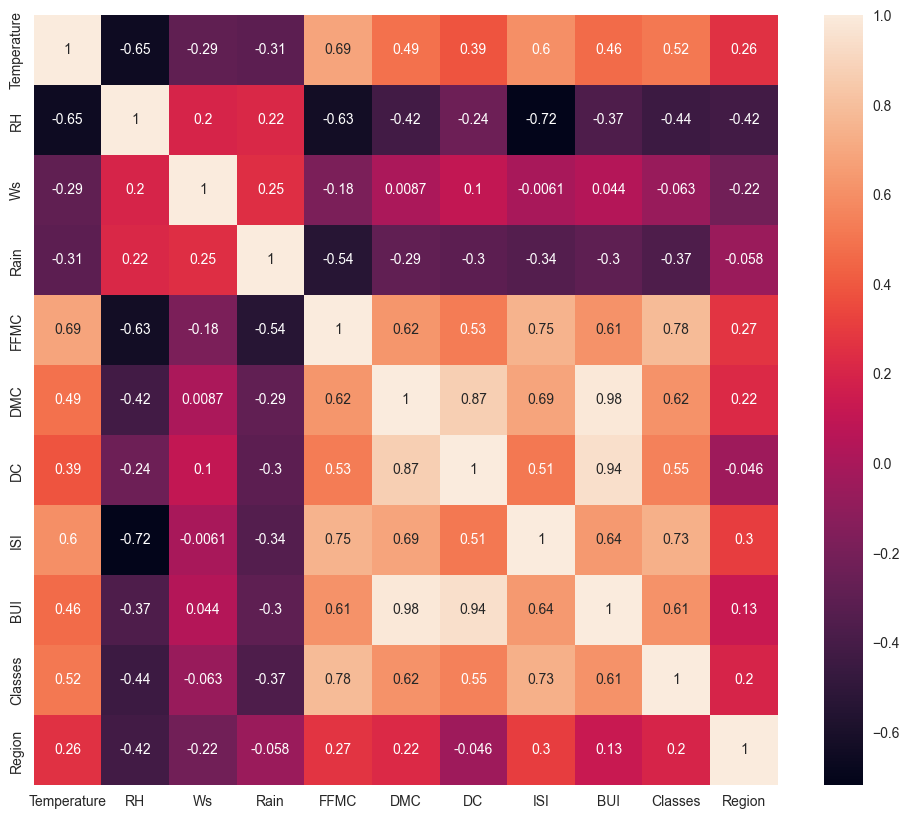

In [51]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [52]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [53]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [54]:
corr_features


{'BUI', 'DC'}

In [55]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((162, 9), (81, 9))

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [57]:
X_train_scaled

array([[-1.12656349,  1.2199876 , -0.22762867, ..., -0.11433646,
         0.90566259,  0.9877296 ],
       [ 0.52256258,  0.1473255 , -0.98795537, ...,  0.09352209,
         0.90566259, -1.01242284],
       [ 0.24770824,  0.34844965, -0.22762867, ...,  0.09352209,
         0.90566259,  0.9877296 ],
       ...,
       [-1.95112653,  0.88478069,  0.53269803, ..., -1.06124763,
        -1.10416397, -1.01242284],
       [ 0.52256258, -0.25492278,  0.15253468, ...,  0.60162077,
         0.90566259,  0.9877296 ],
       [-0.5768548 ,  0.95182207,  2.05335143, ..., -0.85338908,
        -1.10416397, -1.01242284]])

C:\Users\Amamk\AppData\Local\Temp\ipykernel_24804\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

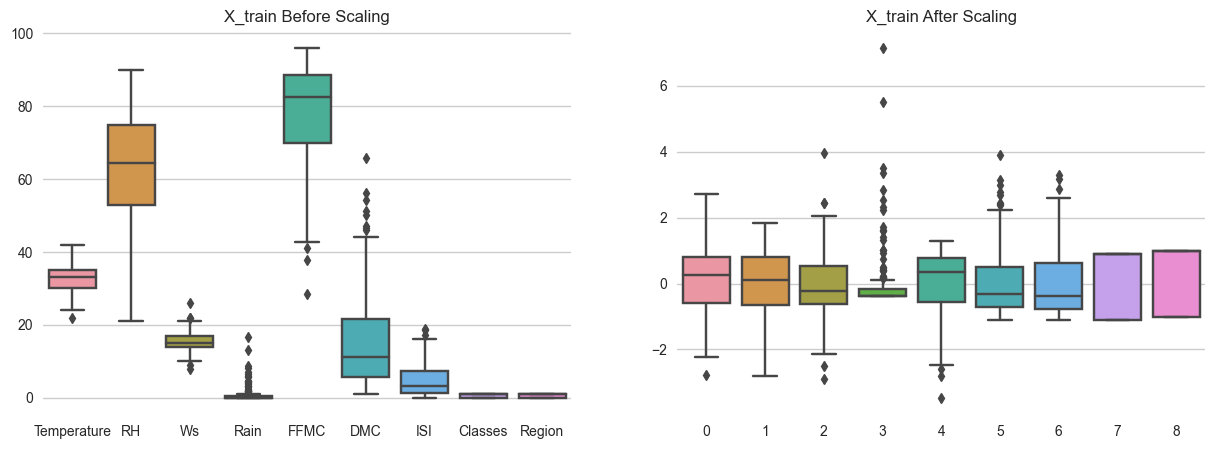

In [58]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Linear Regression model

Mean absolute error 0.5767877823415987
R2 Score 0.9845563190792226


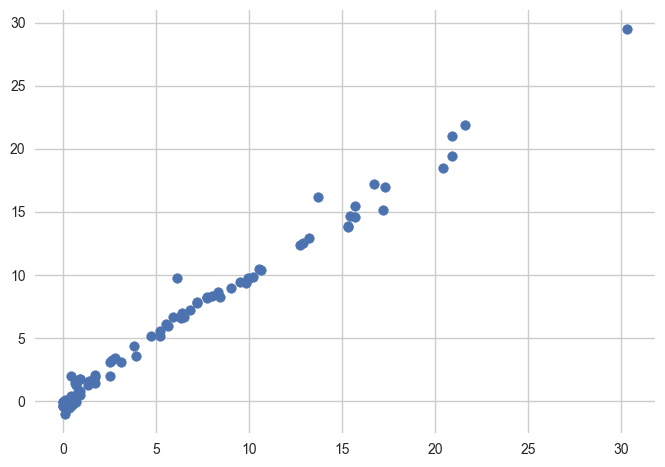

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1053469612945104
R2 Score 0.9514102148198663


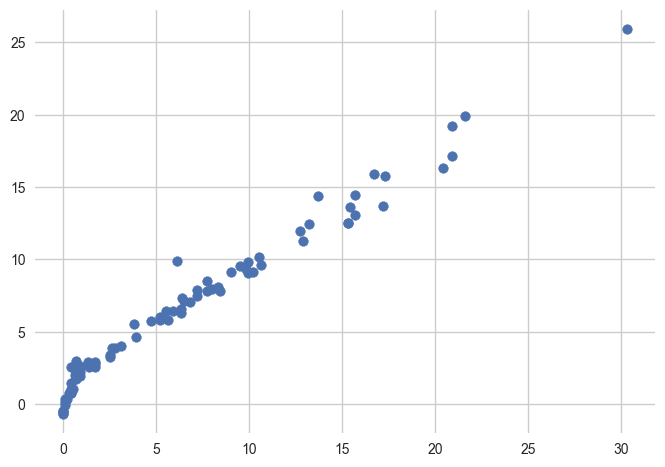

In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [61]:
#Cross Validation Lasso

from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.6041813665539069
R2 Score 0.983629786213086


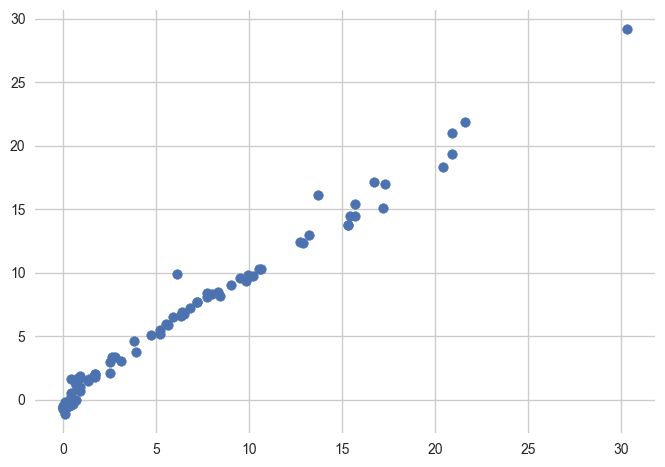

In [62]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)


Mean absolute error 0.5953582907340903
R2 Score 0.9839564989246832


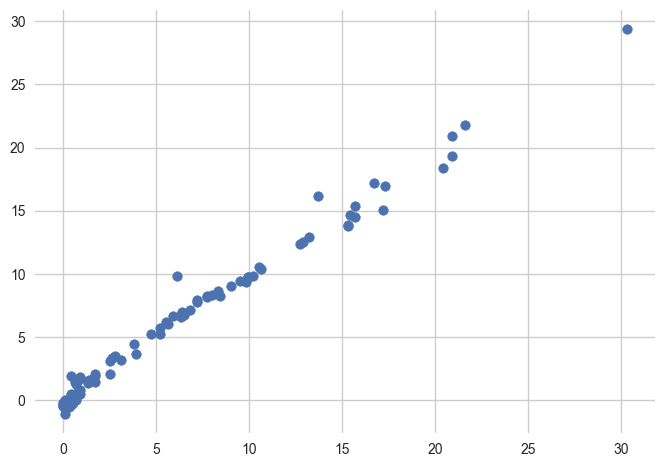

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5953582907340903
R2 Score 0.9839564989246832


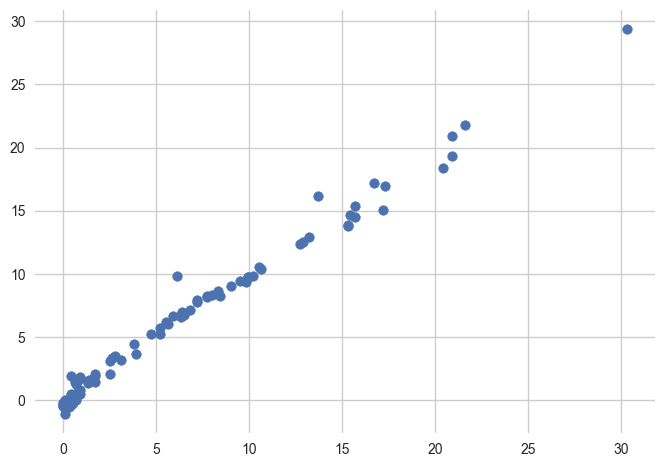

In [64]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [65]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

Mean absolute error 1.834545337587552
R2 Score 0.8825431896054333


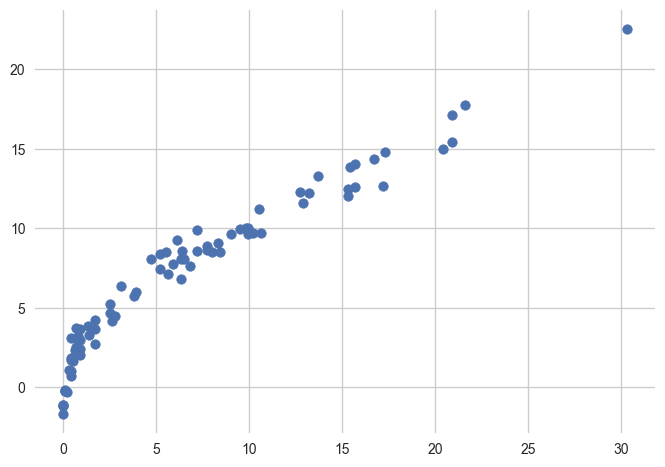

In [66]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6264581775240787
R2 Score 0.9829634557249401


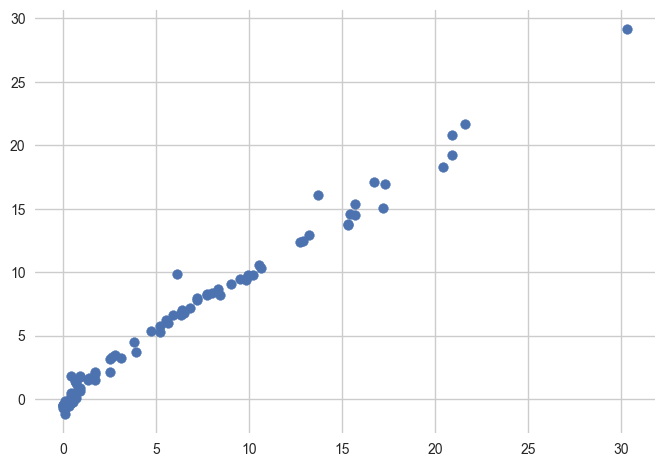

In [67]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)